# 中国经济表现如何？

## 学习目标：画GDP走势图

## Round 1 : 准备好GDP数据

数据来源：东方财富网

地址： http://data.eastmoney.com/cjsj/gdp.html

获取方式：手工下载

保存方式：gdp.csv

|year|gdp      |growth |
|----|---------|-------|
|2006|219438.50|12.70% |
|2007|270232.30|14.20% |
|2008|319515.50|9.70%  |
|2009|349081.40|9.40%  |
|2010|413030.30|10.60% |
|2011|489300.60|9.50%  |
|2012|540367.40|7.90%  |
|2013|595244.40|7.80%  |
|2014|643974.00|7.30%  |
|2015|689052.10|6.90%  |
|2016|744127.20|6.70%  |
|2017|827122.00|6.90%  |


## Round 2 : 从csv读取gdp数据，保存在列表变量中

In [13]:
import sys
import csv

gdp_reader = csv.DictReader(open('gdp.csv', 'r'),)

year    = []
gdp     = []
gdp_inc = []
growth  = []

for record in gdp_reader:
    year.append(int(record['year']))
    gdp.append(float(record['gdp']))
    growth.append(float(record['growth'].strip("%"))/100)

gdp_inc.append(0)
for i in range(1, len(gdp)):
    gdp_inc.append(gdp[i]-gdp[i-1])


## Round 3 : 画gdp总量柱状图

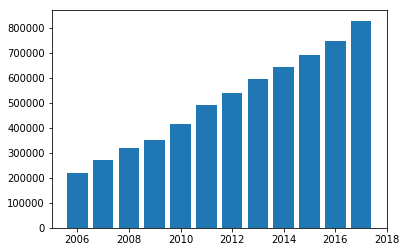

In [6]:
import matplotlib.pyplot as plt  
plt.bar(year, gdp)
plt.show()

## Round 4 : 画gdp增量柱状图

增加难度：
1. 改变柱体颜色
2. 增加柱体图例

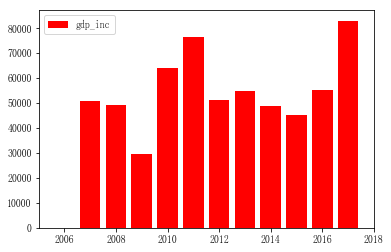

In [14]:
# set color and label
plt.bar(year, gdp_inc, color='red', label='gdp_inc')
plt.legend()  
plt.show()

## Round 5 : 画gdp增长率折线图

增加难度
1. 设置坐标轴范围
2. 设置坐标轴说明
3. 设置图像标题
4. 改变图片大小

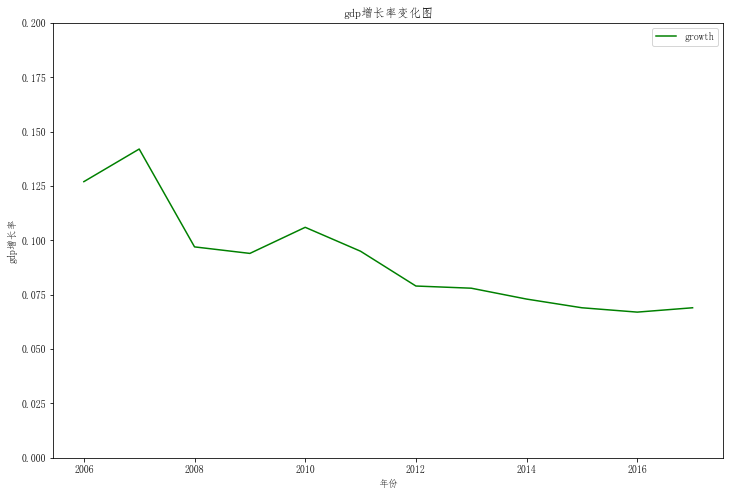

In [15]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

linestyle = "-"
linestyle = "--"
linestyle = "-."
linestyle = ":"

plt.figure(figsize=(12, 8))

# set color, linestyle, label 
# [颜色和线形参数](https://www.cnblogs.com/darkknightzh/p/6117528.html)
plt.plot(year, growth, color='green', linestyle="-", label='growth')

# set value range of y axis
plt.ylim(0, 0.20)

plt.xlabel('年份')
plt.ylabel('gdp增长率')
plt.title('gdp增长率变化图')
plt.legend() 
plt.show()

## Round 6 : 将gdp总量和增加量柱状图画在一起

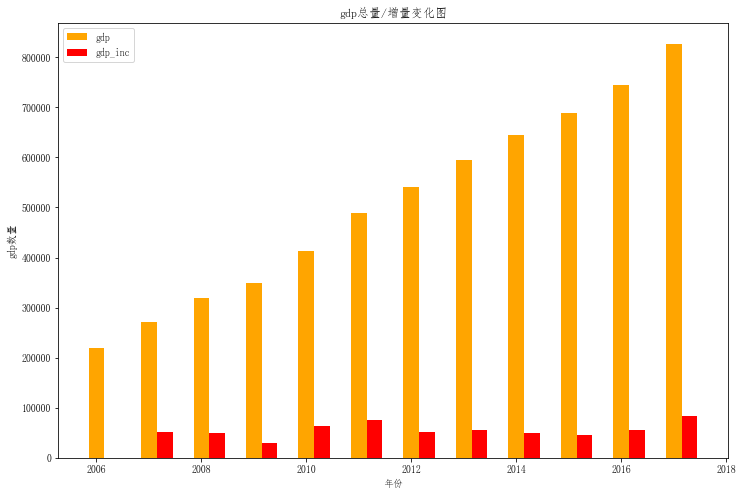

In [16]:
plt.figure(figsize=(12, 8))

# 两个bar合并在一起
plt.bar(year, gdp, width=0.3, color='orange', label='gdp',    )
year_tmp = [x + 0.3 for x in year]
plt.bar(year_tmp, gdp_inc, width=0.3, color='red', label='gdp_inc')

plt.xlabel('年份')
plt.ylabel('gdp数量')
plt.title('gdp总量/增量变化图')

plt.legend()  
plt.show()

## Round 7 : 将gdp总量、增加量柱状图，gdp增长率折线图画在一起

增加要求：
1. 左右两个坐标系
2. 图片保存成png

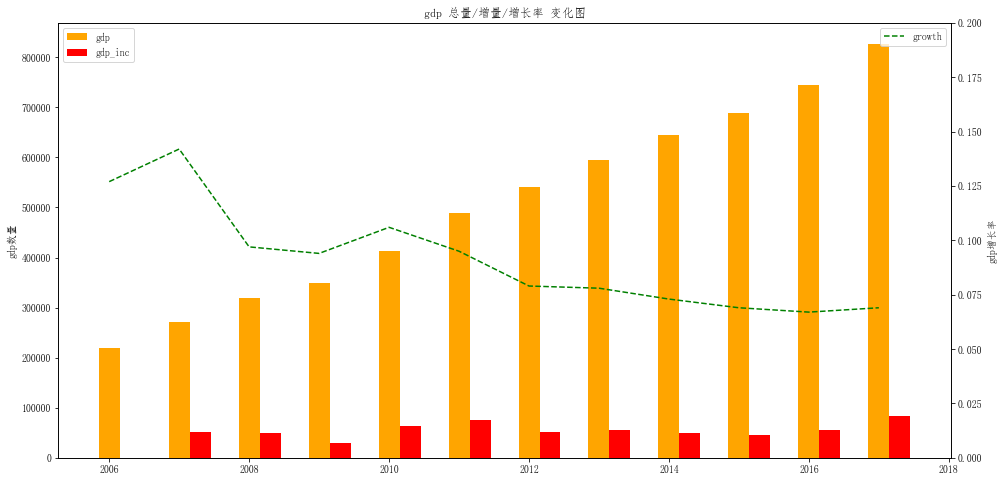

In [18]:
# 双坐标系
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1,1,1)

ax1.bar(year, gdp, width=0.3, color='orange', label='gdp',    )
year_tmp = [x + 0.3 for x in year]
ax1.bar(year_tmp, gdp_inc, width=0.3, color='red',    label='gdp_inc')
ax1.legend(loc='upper left')
ax1.set_ylabel('gdp数量')

ax2 = ax1.twinx()  # this is the important function
ax2.plot(year, growth, color='green', linestyle="--", label='growth')

# set value range of y axis
ax2.set_ylim(0, 0.20)
ax2.legend(loc='upper right') 
ax2.set_ylabel('gdp增长率')

plt.xlabel('年份')

plt.title('gdp 总量/增量/增长率 变化图')

plt.savefig('gdp.png', dpi = 300)
plt.show()
